In [1]:
import numpy as np
import sys
import os
import glob
import getpass
import argparse
import pickle
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from utils import save_dir, analyze_dir, result_dir
from utils import train_pool
from scipy.spatial.distance import cdist
import fnmatch

In [4]:

model_identifier =  'NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.000161_sigma=5.0_nfeat=936-train_test-fixed'
analyze_identifier= 'mftma-exm_per_class=50-proj=False-rand=True-kappa=1e-08-n_t=300-n_rep=5'
train_identifier = 'epochs-10_batch-32_lr-0.01_momentum-0.5_init-gaussian_std-1e-06'


In [5]:
# get mftma files 
mftma_files=[]
for file in os.listdir(os.path.join(analyze_dir,analyze_identifier,model_identifier,train_identifier)):
    if fnmatch.fnmatch(file, '*mftma_analysis.pkl'):
            mftma_files.append(os.path.join(analyze_dir,analyze_identifier,model_identifier,train_identifier,file))

In [6]:
data_=pickle.load(open(mftma_files[0], 'rb'))

In [7]:
data_

{'mftma_results': [{'capacities': [0.3034361561294619],
   'radii': [0.6022646891314709],
   'dimensions': [9.898698606825404],
   'correlations': [0.15764817737397693],
   'capacities_all': [array([0.19402279, 0.23394177, 0.44274625, 0.45902442, 0.42245675,
           0.40037215, 0.24562521, 0.27862618, 0.24973451, 0.24326803,
           0.21014956, 0.43068218, 0.23788978, 0.43600957, 0.23301286,
           0.41587646, 0.21680955, 0.33946824, 0.41902451, 0.40228321,
           0.23067444, 0.23557321, 0.25483763, 0.25468926, 0.24879255,
           0.22765894, 0.26210395, 0.37897147, 0.20633591, 0.22581262,
           0.42319023, 0.23627995, 0.21928748, 0.42411586, 0.43845088,
           0.39829872, 0.43338329, 0.42543446, 0.40504628, 0.42553563,
           0.24629728, 0.38654201, 0.42088776, 0.22024018, 0.41624488,
           0.38211865, 0.24709106, 0.40016179, 0.46349033, 0.4202207 ,
           0.24307312, 0.297676  , 0.25478633, 0.27977703, 0.39308827,
           0.28943363, 0.451138

In [39]:
params = train_pool[model_identifier]()
layer_names=params.get_layer_names()
layer_names

['layer_0_Input', 'layer_1_Linear', 'layer_2_Linear', 'layer_3_Linear']

In [96]:
data_reshaped=dict()
for name in layer_names:
    hierarchy_dict=dict()
    for idx, hierarchy in enumerate(data_['results']):
        category_list=[]
        for category_pairs in hierarchy:
            category_list.append([x[name][0] for x in category_pairs])
        hierarchy_dict[idx]=dict(pairs=category_list, distance=[np.diag(cdist(x[0],x[1])) for x in category_list])
        
    data_reshaped[name]=hierarchy_dict
            

In [131]:
np.mean(np.mean(np.stack(data_reshaped['layer_1_Linear'][3]['distance']),axis=1))

2.3985961746780244

In [54]:
hier_class=np.stack(params.dataset.hierarchical_target)
hier_class=hier_class/np.expand_dims(np.max(hier_class,1),1)

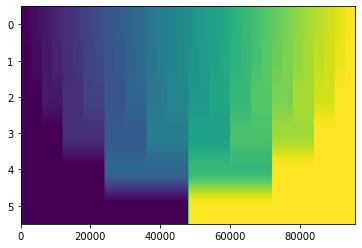

In [56]:
plt.imshow(hier_class,aspect='auto')

In [36]:
#len(data_['projection_results'][1]['layer_2_Linear'])
data_['projection_results'][0]['layer_1_Linear'][0].shape


(1024, 100)

In [39]:
data_['analyze_identifier']

'mftma-exm_per_class=100-proj=False-rand=False-kappa=0-n_t=300-n_rep=1'

In [4]:
fig, axes = plt.subplots(5, len(mftma_resresult_dirs()), figsize=(18, 15))
axes=axes.flatten()
for k in range(4):
    im=axes[k].plot(seq,accu)
    axes[k].legend(['accu'])
    axes[k].set_xlim(min(seq), max(seq))
for j, key in enumerate(mftma_res.keys()):
    mftma=[x['mftma'] for x in mftma_res[key]]
    layer_cap=[[x['capacities'] for x in y] for y in mftma]
    layer_cap=np.stack(layer_cap).squeeze()   
    h0=cm.get_cmap('plasma_r',(layer_cap.shape[1]))
    h0_c=np.flipud(h0(np.arange(layer_cap.shape[1])/layer_cap.shape[1]))
    for i in range(layer_cap.shape[1]):
            im=axes[4+j].plot(layer_cap[:,i],color=h0_c[i,:],linewidth=1,label='hier_'+str(i))
    axes[4+j].set_ylabel(r'$\alpha_M$', fontsize=18)
    axes[4+j].set_xlim(min(seq), max(seq))
    axes[4+j].set_ylim(np.nanmin(layer_cap),np.nanmax(layer_cap))
    #axes[4+j].legend()
    axes[4+j].set_title(key)
    #fig.colorbar(im, ax=axes[4*(k+1)])

idx=8
for j, key in enumerate(mftma_res.keys()):
    mftma=[x['mftma'] for x in mftma_res[key]]
    layer_cap=[[x['radii'] for x in y] for y in mftma]
    layer_cap=np.stack(layer_cap).squeeze()   
    h0=cm.get_cmap('plasma_r',(layer_cap.shape[1]))
    h0_c=np.flipud(h0(np.arange(layer_cap.shape[1])/layer_cap.shape[1]))
    for i in range(layer_cap.shape[1]):
            im=axes[idx+j].plot(layer_cap[:,i],color=h0_c[i,:],linewidth=1,label='hier_'+str(i))
    axes[idx+j].set_ylabel(r'$R_M$', fontsize=18)
    axes[idx+j].set_xlim(min(seq), max(seq))
    axes[idx+j].set_ylim(np.nanmin(layer_cap),np.nanmax(layer_cap))

    axes[idx+j].set_title(key)

idx=12
for j, key in enumerate(mftma_res.keys()):
    mftma=[x['mftma'] for x in mftma_res[key]]
    layer_cap=[[x['dimensions'] for x in y] for y in mftma]
    layer_cap=np.stack(layer_cap).squeeze()   
    h0=cm.get_cmap('plasma_r',(layer_cap.shape[1]))
    h0_c=np.flipud(h0(np.arange(layer_cap.shape[1])/layer_cap.shape[1]))
    for i in range(layer_cap.shape[1]):
            im=axes[idx+j].plot(layer_cap[:,i],color=h0_c[i,:],linewidth=1,label='hier_'+str(i))
    axes[idx+j].set_ylabel(r'$D_M$', fontsize=18)
    axes[idx+j].set_xlim(min(seq), max(seq))
    axes[idx+j].set_ylim(np.nanmin(layer_cap),np.nanmax(layer_cap))
    
    axes[idx+j].set_title(key)

idx=16
for j, key in enumerate(mftma_res.keys()):
    mftma=[x['mftma'] for x in mftma_res[key]]
    layer_cap=[[x['correlations'] for x in y] for y in mftma]
    layer_cap=np.stack(layer_cap).squeeze()   
    h0=cm.get_cmap('plasma_r',(layer_cap.shape[1]))
    h0_c=np.flipud(h0(np.arange(layer_cap.shape[1])/layer_cap.shape[1]))
    for i in range(layer_cap.shape[1]):
            im=axes[idx+j].plot(layer_cap[:,i],color=h0_c[i,:],linewidth=1,label='hier_'+str(i))
    axes[idx+j].set_ylabel(r'$\rho_{center}$', fontsize=18)
    axes[idx+j].set_xlim(min(seq), max(seq))
    axes[idx+j].set_ylim(np.nanmin(layer_cap),np.nanmax(layer_cap))
    axes[idx+j].legend()
    axes[idx+j].set_title(key)

plt.suptitle(model_identifier)
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(result_dir,analyze_identifier,model_identifier+'_hierarchy_vals_during_training.png'),transparent=True)

NameError: name 'mftma_resresult_dirs' is not defined

# training accurary for different sigma and beta 

In [8]:
from utils import save_dir, analyze_dir

In [21]:
struct_list=['partition','tree']
nhier=[1,6]
beta=[0.0, 0.016, 0.033, 0.05]
sigma=[0.0, 0.833, 1.667, 2.5]
nclass=[64,96]
model_train_test_acc=[]
for b in beta:
    for s in sigma:
        for n in nclass:
            for idx , struct in enumerate(struct_list):
                model=f"NN-{struct_list[idx]}_nclass={n}_nobj={n * 1000}_nhier={nhier[idx]}_beta={b}_sigma={s}_nfeat=3072-train_test-fixed"
                model_train_acc=f'acc_train_{model}.csv'
                model_test_acc=f'acc_test_{model}.csv'
                train=open(os.path.join(save_dir,model,model_train_acc),'r')
                train_lines=[float(x) for x in train.read().splitlines()]
                train.flush()
                test=open(os.path.join(save_dir,model,model_test_acc),'r')
                test_lines=[float(x) for x in test.read().splitlines()]
                test.flush()

                model_train_test_acc.append(dict(beta=b,sigma=s,nclass=n,structure=struct,n_hier=nhier[idx],name=model,train_acc=train_lines,test_acc=test_lines))

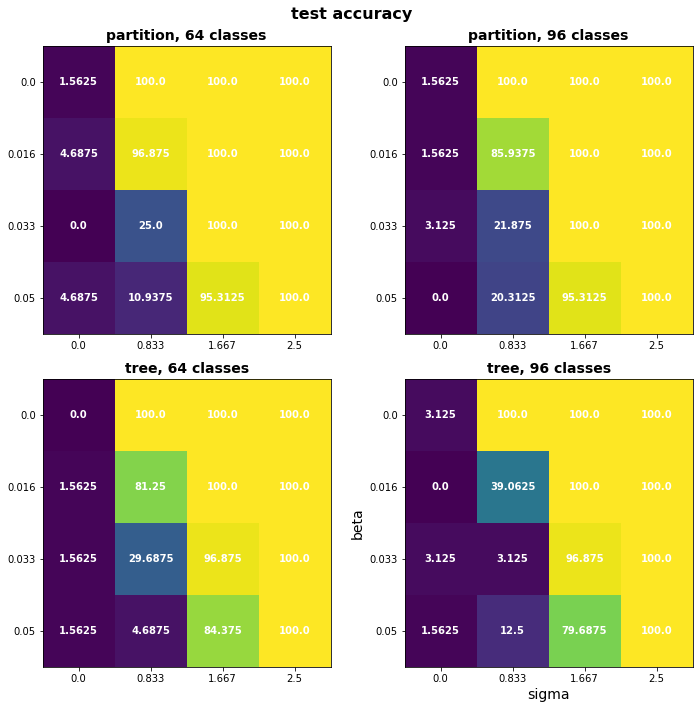

In [84]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes=axes.flatten()
st='partition'
ncl=64
ax=axes[0]
data=[(x['beta'],x['sigma'],x['train_acc'][-1],x['test_acc'][-1]) for x in model_train_test_acc if x['structure']==st and x['nclass']==ncl ]
b_val=np.asarray(data)[:,0].reshape(4,4)
s_val=np.asarray(data)[:,1].reshape(4,4)
test_val=np.asarray(data)[:,3].reshape(4,4)
ax.imshow(test_val)
ax.set_xticks(np.arange(s_val.shape[0]))
ax.set_yticks(np.arange(b_val.shape[0]))
ax.set_xticklabels(s_val.mean(axis=0))
ax.set_yticklabels(b_val.mean(axis=1))
for i in range(b_val.shape[0]):
    for j in range(s_val.shape[0]):
        text = ax.text(j, i, test_val[i, j],
                       ha="center", va="center", color="w",fontweight='bold')
ax.set_title(f'{st}, {ncl} classes',fontsize=14,fontweight='bold')


st='partition'
ncl=96
ax=axes[1]
data=[(x['beta'],x['sigma'],x['train_acc'][-1],x['test_acc'][-1]) for x in model_train_test_acc if x['structure']==st and x['nclass']==ncl ]
b_val=np.asarray(data)[:,0].reshape(4,4)
s_val=np.asarray(data)[:,1].reshape(4,4)
test_val=np.asarray(data)[:,3].reshape(4,4)
ax.imshow(test_val)
ax.set_xticks(np.arange(s_val.shape[0]))
ax.set_yticks(np.arange(b_val.shape[0]))
ax.set_xticklabels(s_val.mean(axis=0))
ax.set_yticklabels(b_val.mean(axis=1))
for i in range(b_val.shape[0]):
    for j in range(s_val.shape[0]):
        text = ax.text(j, i, test_val[i, j],
                       ha="center", va="center", color="w",fontweight='bold')
ax.set_title(f'{st}, {ncl} classes',fontsize=14,fontweight='bold')


st='tree'
ncl=64
ax=axes[2]
data=[(x['beta'],x['sigma'],x['train_acc'][-1],x['test_acc'][-1]) for x in model_train_test_acc if x['structure']==st and x['nclass']==ncl ]
b_val=np.asarray(data)[:,0].reshape(4,4)
s_val=np.asarray(data)[:,1].reshape(4,4)
test_val=np.asarray(data)[:,3].reshape(4,4)
ax.imshow(test_val)
ax.set_xticks(np.arange(s_val.shape[0]))
ax.set_yticks(np.arange(b_val.shape[0]))
ax.set_xticklabels(s_val.mean(axis=0))
ax.set_yticklabels(b_val.mean(axis=1))
for i in range(b_val.shape[0]):
    for j in range(s_val.shape[0]):
        text = ax.text(j, i, test_val[i, j],
                       ha="center", va="center", color="w",fontweight='bold')
ax.set_title(f'{st}, {ncl} classes',fontsize=14,fontweight='bold')

st='tree'
ncl=96
ax=axes[3]
data=[(x['beta'],x['sigma'],x['train_acc'][-1],x['test_acc'][-1]) for x in model_train_test_acc if x['structure']==st and x['nclass']==ncl ]
b_val=np.asarray(data)[:,0].reshape(4,4)
s_val=np.asarray(data)[:,1].reshape(4,4)
test_val=np.asarray(data)[:,3].reshape(4,4)
ax.imshow(test_val)
ax.set_xticks(np.arange(s_val.shape[0]))
ax.set_yticks(np.arange(b_val.shape[0]))
ax.set_xticklabels(s_val.mean(axis=0))
ax.set_yticklabels(b_val.mean(axis=1))
for i in range(b_val.shape[0]):
    for j in range(s_val.shape[0]):
        text = ax.text(j, i, test_val[i, j],
                       ha="center", va="center", color="w",fontweight='bold')
ax.set_title(f'{st}, {ncl} classes',fontsize=14,fontweight='bold')

ax.set_xlabel('sigma',fontsize=14)
ax.set_ylabel('beta',fontsize=14)
plt.suptitle('test accuracy',fontsize=16,fontweight='bold')
fig.tight_layout()

if not os.path.exists(os.path.join(result_dir,'training_result')):
        os.mkdir(os.path.join(result_dir,'training_result'))
fig.savefig(os.path.join(result_dir,'training_result',f'test_accu_structures:partition,tree_betas:{b_val.min()},{b_val.max()}_sigmas:{s_val.min()},{s_val.max()}.png'),transparent=True)